# Типы кластеризации

## Иерархическая кластеризация (дендрограмма)

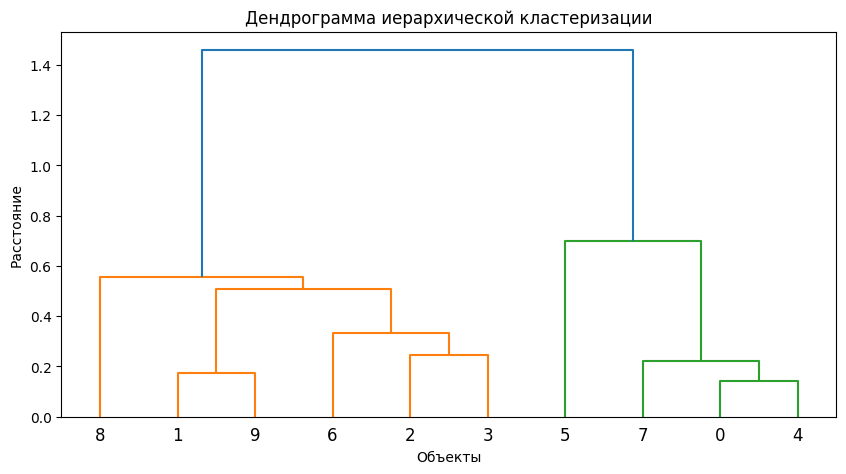

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

data = load_iris().data[:10]  

linked = linkage(data, method='complete')

plt.figure(figsize=(10, 5))
dendrogram(linked, labels=range(10))
plt.title("Дендрограмма иерархической кластеризации")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")
plt.show()

## Разделительная кластеризация (k-means)

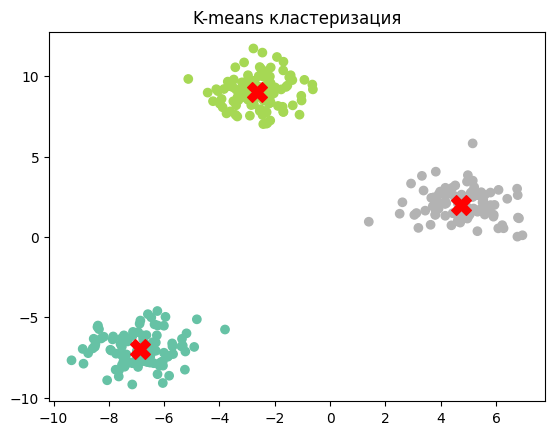

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Кластеризация
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X')
plt.title("K-means кластеризация")
plt.show()

## Плотностная кластеризация (DBSCAN)

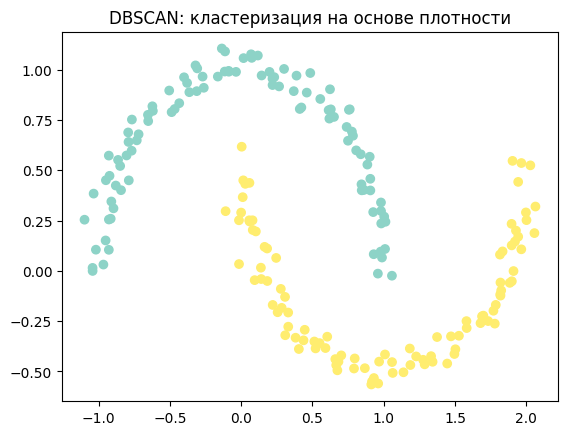

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Кластеризация
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set3')
plt.title("DBSCAN: кластеризация на основе плотности")
plt.show()

## Сеточная кластеризация (CLIQUE)

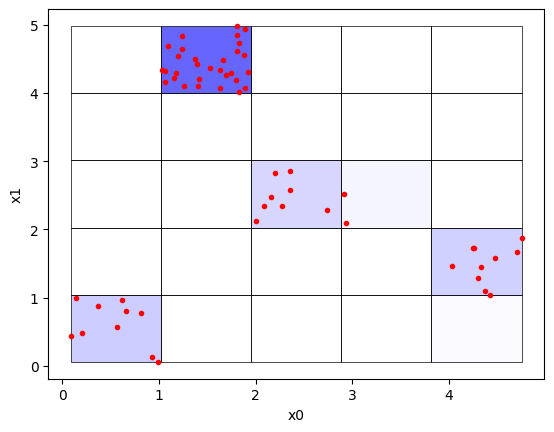

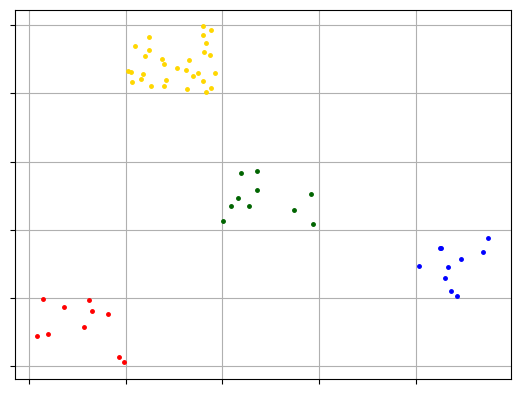

In [22]:
from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES

# Загрузка данных
data = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)

# Параметры: интервалы на каждое измерение, плотность
intervals = 5  # Количество интервалов в каждом измерении
threshold = 0   # Минимальное количество точек для создания ячейки
clique_instance = clique(data, intervals, threshold)
clique_instance.process()

# Получаем ячейки (grid) и кластеры
cells = clique_instance.get_cells()     # Ячейки сетки
clusters = clique_instance.get_clusters()  # Найденные кластеры

# Визуализация
clique_visualizer.show_grid(cells, data)  
clique_visualizer.show_clusters(data, clusters)

## Спектральная кластеризация 

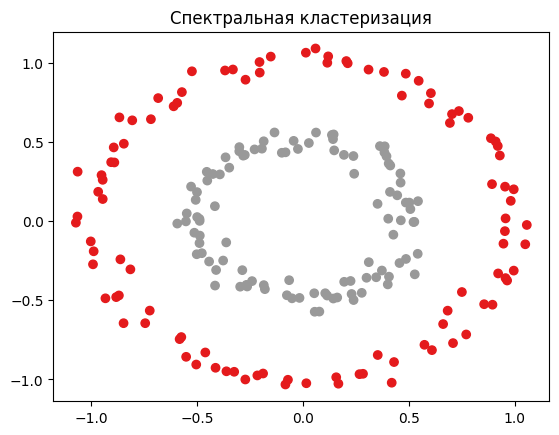

In [38]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=42)

# Кластеризация
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
labels = spectral.fit_predict(X)

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1')
plt.title("Спектральная кластеризация")
plt.show()